# The Path of the Forgotten Gate

<img src="./my_game_map_image.png" alt="The path of the forgotten gate" width="400" height="400">


In [23]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

A location is a place that characters can go to. Locations can be connected to other locations, creating a graph of places to visit, eg. the game map.

In [24]:
broken_path = things.Location(
    "Broken Path",
    "You wake up at the edge of an ancient, broken stone path that winds through a dark forest. Strange runes are carved into weathered stones along the path's edge. The air feels heavy with ancient magic."
)

forest_glade = things.Location(
    "Forest Glade",
    "You stand in a dark forest glade. Ancient trees tower above you, their branches forming a canopy that blocks most sunlight. Enchanted vines writhe around a small clearing where something glimmers."
)

center_path = things.Location(
    "Center Path",
    "The path widens here into a circular clearing. In the center stands a mound of earth with something protruding from it. The path splits in multiple directions from here."
)

mushroom_cave = things.Location(
    "Mushroom Cave",
    "You enter a damp cave lit by the eerie glow of red mushrooms growing from the walls. The air shimmers with magical energy, and something purple glows deeper in the cave."
)

stone_ruins = things.Location(
    "Stone Ruins",
    "You stand among crumbling stone ruins covered in moss and strange markings. Ancient pillars jut from the ground at odd angles. The earth here looks recently disturbed."
)

whirlpool_path = things.Location(
    "Whirlpool Path",
    "The path leads to the edge of a dark whirlpool of swirling mist and shadow. You can see skeletal hands reaching up from the depths. This place radiates danger."
)

rune_chamber = things.Location(
    "Rune Chamber",
    "You stand before five stone tiles, each carved with glowing runes. The tiles form a path across a deep chasm. Beyond them, you can see the golden glow of your destination."
)

golden_gate = things.Location(
    "Golden Gate",
    "You have reached the legendary Gate of Eternity! The massive golden gate stands before you, flanked by four blue flames that dance without fuel. The gate radiates immense power."
)





## Loose state location

In [25]:

abyss = things.Location(
    "Abyss",
    "You fall into the endless darkness as the rune tiles collapse beneath you. The ancient magic claims another victim. THE END."
)
abyss.set_property("game_over", True)

whirlpool_death = things.Location(
    "Whirlpool Death",
    "The skeletal hands drag you down into the swirling darkness. You become another lost soul trapped in the whirlpool forever. THE END."
)
whirlpool_death.set_property("game_over", True)

flame_death = things.Location(
    "Flame Death",
    "The blue flames surge forward and consume you as you stand helpless before the locked gate. Your quest ends in eternal fire. THE END."
)
flame_death.set_property("game_over", True)

### Connecting Locations

You start at the Broken Path, which connects north to the Forest Glade and east to the Center Path. From there, you can reach the Mushroom Cave to the east, the Stone Ruins to the south (with a dangerous Whirlpool Path beyond), and the Rune Chamber to the north, which finally leads to the Golden Gate.

In [26]:


broken_path.add_connection("north", forest_glade)
broken_path.add_connection("east", center_path)

forest_glade.add_connection("south", broken_path)

center_path.add_connection("west", broken_path)
center_path.add_connection("north", rune_chamber)
center_path.add_connection("east", mushroom_cave)
center_path.add_connection("south", stone_ruins)

mushroom_cave.add_connection("west", center_path)

stone_ruins.add_connection("north", center_path)
stone_ruins.add_connection("east", whirlpool_path)

whirlpool_path.add_connection("west", stone_ruins)

rune_chamber.add_connection("south", center_path)
rune_chamber.add_connection("north", golden_gate)

golden_gate.add_connection("south", rune_chamber)

**NOTE**: Being able to go _out_ implies that you can also go _in_ from the other direction. The Text Adventures framework will account for that automatically when you use one of the following pairs:

* north/south
* east/west
* up/down
* in/out
* inside/outside

<h2>Blocks</h2>

In [27]:

rune_block = blocks.Block(
    name="rune_block",
    description="The rune tiles block your path. You need to solve the puzzle to proceed."
)
center_path.add_block(rune_block)


class WhirlpoolBlock(blocks.Block):
    def __init__(self, direction, message):
        super().__init__(direction, message)

    def is_blocked(self, character, direction, location):
        
        for item_name, item in character.inventory.items():
            if item.get_property("is_crystal"):
                return False  
        return True  



whirlpool_block = WhirlpoolBlock(
    "east",
    "As you approach the whirlpool, skeletal hands reach up toward you! You need the Crystal of Warding to survive this path."
)
stone_ruins.add_block("east", whirlpool_block)

TypeError: add_block() missing 1 required positional argument: 'block'

## Items

Items can be placed at locations or they can be placed in a character's inventory. Any details about the item that may be interesting should be added as properties.

In [28]:

wooden_shard = things.Item(
    "shard",
    "a wooden shard",
    "A sharp piece of weathered wood, broken from an ancient staff. It could be used to cut through vines."
)
wooden_shard.set_property("gettable", True)
wooden_shard.set_property("is_cutter", True)
broken_path.add_item(wooden_shard)


enchanted_vines = things.Item(
    "vines",
    "enchanted vines",
    "Thick, writhing vines that move with unnatural life. They seem to be protecting something behind them."
)
enchanted_vines.set_property("gettable", False)
enchanted_vines.set_property("is_blocking", True)
enchanted_vines.set_property("can_be_cut", True)
forest_glade.add_item(enchanted_vines)


ancient_key = things.Item(
    "key",
    "an ancient key",
    "A ornate golden key covered in mystical runes. It pulses with ancient magic and feels warm to the touch."
)
ancient_key.set_property("gettable", True)
ancient_key.set_property("is_ancient_key", True)


shovel = things.Item(
    "shovel",
    "the Shovel of the Fallen",
    "An ancient shovel standing upright in a mound of earth. Its blade gleams despite its age."
)
shovel.set_property("gettable", True)
shovel.set_property("is_shovel", True)
center_path.add_item(shovel)


crystal = things.Item(
    "crystal",
    "the Crystal of Warding",
    "A beautiful crystal that glows with purple light. It radiates protective energy."
)
crystal.set_property("gettable", True)
crystal.set_property("is_crystal", True)
mushroom_cave.add_item(crystal)


tablet = things.Item(
    "tablet",
    "the Tablet of Runes",
    "An ancient stone tablet covered in glowing runes. It shows the safe path across the rune chamber."
)
tablet.set_property("gettable", True)
tablet.set_property("is_tablet", True)


disturbed_earth = things.Item(
    "earth",
    "disturbed earth",
    "A patch of earth that looks recently disturbed. Something might be buried here."
)
disturbed_earth.set_property("gettable", False)
disturbed_earth.set_property("can_be_dug", True)
stone_ruins.add_item(disturbed_earth)


rune_tiles = things.Item(
    "tiles",
    "rune tiles",
    "Five stone tiles carved with glowing runes, forming a path across the chasm. Each tile shows a different ancient symbol."
)
rune_tiles.set_property("gettable", False)
rune_tiles.set_property("is_puzzle", True)
rune_chamber.add_item(rune_tiles)


gate = things.Item(
    "gate",
    "the Golden Gate",
    "The legendary Gate of Eternity! It stands tall and magnificent, but it is sealed shut. A keyhole glows in its center."
)
gate.set_property("gettable", False)
gate.set_property("is_gate", True)
gate.set_property("is_locked", True)
golden_gate.add_item(gate)


blue_flames = things.Item(
    "flames",
    "blue flames",
    "Four mystical blue flames dance around the gate. They seem to guard the entrance."
)
blue_flames.set_property("gettable", False)
blue_flames.set_property("is_flames", True)
golden_gate.add_item(blue_flames)


## Characters

A character is some living thing that can perform actions, such as your player which has abilities to `cut_vines` function checks if the player has the Wooden Shard in their inventory while standing in the Forest Glade. If they do, the enchanted vines are sliced open and the Ancient Key is revealed, allowing progress. If they don’t, the game simply responds that nothing sharp enough is available, keeping the path blocked. This shows how custom actions in the game depend on both the right item and the right location.

In [29]:
player = things.Character(
    name="The Seeker",
    description="You are a brave adventurer seeking the legendary Gate of Eternity and the eternal glory it promises.",
    persona="I must find the Gate of Eternity and claim my destiny."
)

## Action

You can define your own custom actions for the game. Actions consist of two of three parts:

* the intitialization, which parses the arguments
* the preconditions, which determine if the action can be applied
* the effect, which change the state of the game when the action is successfully applied

In [30]:
class CutVines(actions.Action):
    ACTION_NAME = "cut"
    ACTION_DESCRIPTION = "Cut the enchanted vines with the wooden shard"

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.character = self.parser.get_character(command)
        self.vines = self.parser.match_item(
            command, self.parser.get_items_in_scope(self.character))
        self.tool = None

        # Look for wooden shard in inventory
        for item_name, item in self.character.inventory.items():
            if item.get_property("is_cutter"):
                self.tool = item
                break

    def check_preconditions(self) -> bool:
        if not self.vines or not self.vines.get_property("can_be_cut"):
            self.parser.fail("There's nothing here that can be cut.")
            return False
        if not self.tool:
            self.parser.fail("You need something sharp to cut the vines!")
            return False
        return True

    def apply_effects(self):
        forest_glade.remove_item(self.vines)
        forest_glade.add_item(ancient_key)
        self.parser.ok(
            "You cut through the enchanted vines with the wooden shard! Behind them, you discover the Ancient Key glowing with mystical power.")


class DigEarth(actions.Action):
    ACTION_NAME = "dig"
    ACTION_DESCRIPTION = "Dig in the disturbed earth with the shovel"

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.character = self.parser.get_character(command)
        self.earth = self.parser.match_item(
            command, self.parser.get_items_in_scope(self.character))
        self.shovel = None

        # Look for shovel in inventory
        for item_name, item in self.character.inventory.items():
            if item.get_property("is_shovel"):
                self.shovel = item
                break

    def check_preconditions(self) -> bool:
        if not self.earth or not self.earth.get_property("can_be_dug"):
            self.parser.fail("There's nothing here that can be dug.")
            return False
        if not self.shovel:
            self.parser.fail("You need a shovel to dig!")
            return False
        return True

    def apply_effects(self):
        stone_ruins.remove_item(self.earth)
        stone_ruins.add_item(tablet)
        self.parser.ok(
            "You dig into the disturbed earth with the Shovel of the Fallen! You uncover the ancient Tablet of Runes!")


class SolveRunes(actions.Action):
    ACTION_NAME = "step"
    ACTION_DESCRIPTION = "Step on the rune tiles in the correct order"
    ACTION_ALIASES = ["solve", "cross", "walk"]

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.character = self.parser.get_character(command)
        self.tiles = self.parser.match_item(
            command, self.parser.get_items_in_scope(self.character))
        self.tablet = None

        # Look for tablet in inventory
        for item_name, item in self.character.inventory.items():
            if item.get_property("is_tablet"):
                self.tablet = item
                break

    def check_preconditions(self) -> bool:
        if not self.tiles or not self.tiles.get_property("is_puzzle"):
            self.parser.fail("There's no puzzle to solve here.")
            return False
        if not self.tablet:
            self.parser.fail(
                "You need the Tablet of Runes to know the safe path! Without it, you risk falling into the abyss.")
            return False
        return True

    def apply_effects(self):
        center_path.remove_block(rune_block)
        print(f"DEBUG: rune_block removed? {'rune_block' not in center_path.blocks}")
        self.parser.ok(
            "Using the Tablet of Runes as your guide, you step carefully on each tile in the correct sequence. "
            "The runes glow brighter with each step, and the path to the Golden Gate opens before you!"
        )



class UnlockGate(actions.Action):
    ACTION_NAME = "unlock"
    ACTION_DESCRIPTION = "Unlock the Golden Gate with the Ancient Key"
    ACTION_ALIASES = ["open", "use"]

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.character = self.parser.get_character(command)
        self.gate = self.parser.match_item(
            command, self.parser.get_items_in_scope(self.character))
        self.key = None

        # Look for ancient key in inventory
        for item_name, item in self.character.inventory.items():
            if item.get_property("is_ancient_key"):
                self.key = item
                break

    def check_preconditions(self) -> bool:
        if not self.gate or not self.gate.get_property("is_gate"):
            self.parser.fail("There's no gate here to unlock.")
            return False
        if not self.key:
            self.parser.fail(
                "You need the Ancient Key to unlock the Gate of Eternity!")
            return False
        return True

    def apply_effects(self):
        self.gate.set_property("is_locked", False)
        golden_gate.remove_item(blue_flames)
        self.character.set_property("has_eternal_glory", True)
        self.parser.ok("You insert the Ancient Key into the gate's lock! The key turns with a satisfying click, and the gate begins to swing open. The blue flames extinguish, and brilliant golden light pours forth. You step through the Gate of Eternity and claim your eternal glory!")


class ForgottenGateGame(games.Game):
    def __init__(self, start_at: things.Location, player: things.Character, characters=None, custom_actions=None):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)

    def is_won(self) -> bool:
        """
        Player wins by unlocking the Golden Gate and gaining eternal glory.
        """
        if self.player.get_property("has_eternal_glory"):
            self.parser.ok(
                "Congratulations! You have successfully navigated the Path of the Forgotten Gate and achieved eternal glory!")
            return True
        return False

    def game_loop(self):
        """Override game loop to handle special location checks"""
        print("=" * 50)
        print("THE PATH OF THE FORGOTTEN GATE")
        print("=" * 50)
        print("You wake up at the edge of an ancient, broken path...")
        print("Legend speaks of the Gate of Eternity at the far end.")
        print("Your quest for eternal glory begins now!")
        print("=" * 50)

        super().game_loop()

## The Game

The game class, defined in `text_adventures.games`:

- list of characters, one designated as player
- all locations in the game
- special function to determine if game has been won
- functions for saving and loading game states, which we'll see later.
- a game loop that runs the game, interacting with the user via commands

To create our fishing game, we will subclass `Game` and define the `is_won` function to check when the game is won. In this case, the player starts out hungry, shown by calling `set_property` on the player.

## Commands

In text adventure games the user types in simple natural language commands to interact with the game environment. That text is parsed for meaning and actions may or may not take place as a result.

One of the challenges for the parser is mapping the language to corresponding components of the game. Classic text adventure games use simple two word commands, eg. _go east_ or _get pole_.

In the next section, you will see five commands that will guide you through our game.

## Let's Play!

*Behold, as a magestic prompt appears!*

You can play through the whole game with the following commands:

1. take pole
2. go out
3. south
4. catch fish with pole
5. eat fish

In [34]:

game = ForgottenGateGame(
    broken_path,
    player,
    custom_actions=[CutVines, DigEarth, SolveRunes, UnlockGate]
)
game.game_loop()



THE PATH OF THE FORGOTTEN GATE
You wake up at the edge of an ancient, broken path...
Legend speaks of the Gate of Eternity at the far end.
Your quest for eternal glory begins now!
You wake up at the edge of an ancient, broken stone path that winds through a
dark forest. Strange runes are carved into weathered stones along the path's
edge. The air feels heavy with ancient magic.
Exits:
North to Forest Glade
East to Center Path






KeyboardInterrupt: Interrupted by user

### Visualize Game

One way of conceptualizing our games is as a directed graph, where nodes are locations connected via directed arcs.  We can vizualize our game as a directed graph.

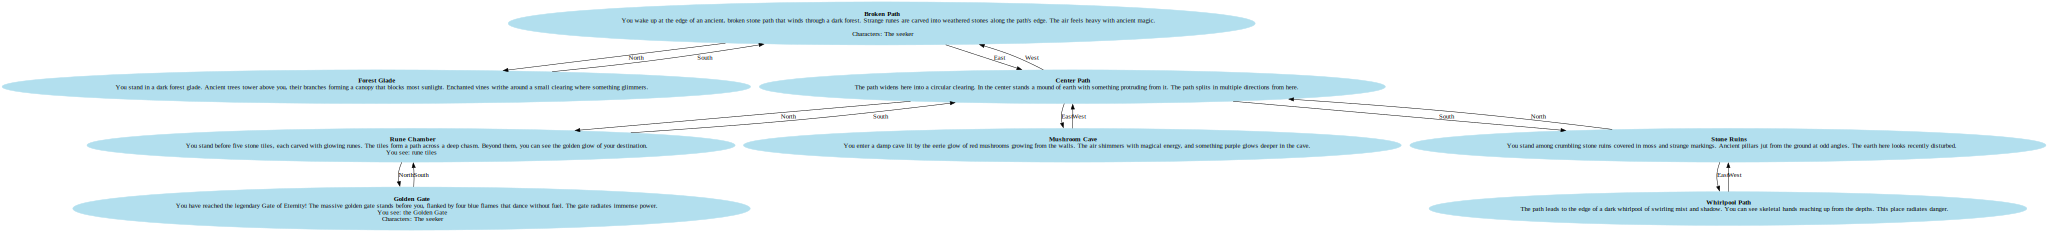

In [35]:
from text_adventure_games.viz import Visualizer
viz = Visualizer(game)
graph = viz.visualize()
graph

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b16fb3c8-85ab-4463-b29e-8658c8738191' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>